Primary tests and data explorations
look at data
deal with nan values
deal with outliers
see which are continuous 
see which are categorical 
sort them respectively 
then other model stuff
multicolinearity
skewness, normality, standardize
check model assumptions
    normality,
    linearity,
    hetroscadisticity 
    OLS etc

## Final Project Submission

Please fill out:
* Student name: Saifuddin Anjarwalla
* Student pace: #self paced# / part time / full time
* Scheduled project review date/time: 11 August 2020
* Instructor name: Jeff Herman
* Blog post URL:


What do we want to achieve?

We want to create a program that can evaluate the price of your house given certain details about it.

we want this to be a tool for house buyers to be able to use to be more informed about the price they should pay for their home.

We  want to achieve this as there has long been an issue of unknowing consumers being conned my house agencies.


In [1]:
#Uploading data sets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.stats.api as sms
from sklearn.model_selection import KFold
from itertools import combinations

In [2]:
#understnading the data set
df = pd.read_csv('kc_house_data.csv')
display(df.head())
display(df.info())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
#drop ID
df.drop('id', axis = 1, inplace = True)

In [5]:
#check for duplicate rows
df.duplicated().sum()

0

In [6]:
#nan values
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df[['yr_renovated']].isna().sum()/len(df) # too many NAN's so we delete

yr_renovated    0.177895
dtype: float64

In [8]:
df.drop('yr_renovated', axis = 1, inplace = True)

In [9]:
df[['waterfront']].isna().sum()/len(df) # i think its okay if we have 10% less data set so lets delete NAN

waterfront    0.110015
dtype: float64

In [10]:
df.dropna(subset = ['waterfront'], inplace = True)

In [11]:
df.view.value_counts() #im not particularly sure what view is, i think it means how many times one has come tp view
                        # the house however in that case it doesnt make sense to have soo many 0's as such i will 
                        # drop the column

0.0    17312
2.0      836
3.0      435
1.0      291
4.0      290
Name: view, dtype: int64

In [12]:
df.drop('view', axis = 1, inplace = True)

Check for strange values that dont make sense

In [13]:
for column in df.columns:
    print (column)
    print (df[column].value_counts().head())
    print (len(df[column].value_counts()))
    print ('\n')

date
6/23/2014    124
6/25/2014    120
6/26/2014    116
7/8/2014     114
4/21/2015    112
Name: date, dtype: int64
370


price
450000.0    153
350000.0    147
550000.0    144
500000.0    142
425000.0    135
Name: price, dtype: int64
3391


bedrooms
3    8721
4    6149
2    2451
5    1441
6     227
Name: bedrooms, dtype: int64
12


bathrooms
2.50    4839
1.00    3411
1.75    2725
2.25    1788
2.00    1722
Name: bathrooms, dtype: int64
29


sqft_living
1300    125
1440    121
1400    120
1820    118
1660    113
Name: sqft_living, dtype: int64
992


sqft_lot
5000    329
6000    253
4000    222
7200    186
4800    112
Name: sqft_lot, dtype: int64
9070


floors
1.0    9493
2.0    7350
1.5    1681
3.0     546
2.5     145
Name: floors, dtype: int64
6


waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64
2


condition
3    12474
4     5058
5     1512
2      152
1       25
Name: condition, dtype: int64
5


grade
7     7974
8     5409
9     2320
6     1810
10    1018
Name: grade,

Bathrooms: haveing decimals of bathrooms is strange however there are only 29 unique values thus i dont think it is something to worry about, it is likely something i simply do not understand eg. a toilet but no shower = 0.5 of a bathroom

sqft_basement: ther are a number of ? this is something i will need to investigate


([<matplotlib.axis.XTick at 0x1c260ee4a8>,
 <a list of 3 Text xticklabel objects>)

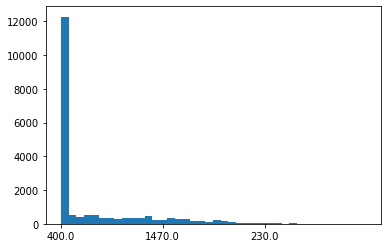

In [14]:
plt.hist(df['sqft_basement'],bins = 40)
plt.xticks(np.arange(0, 300, step=100))

In [15]:
#perhaps the ? indicates that there is no basement lets see if this is true
len(df.loc[(df['sqft_basement'] == '?') & (df['sqft_living'] == df['sqft_above']) ,['sqft_living','sqft_above']])

260

In [16]:
len(df.loc[(df['sqft_basement'] == '?') & (df['sqft_living'] != df['sqft_above']) ,['sqft_living','sqft_above']])

157

In [17]:
260+157 # lets change it to basement or not

417

In [18]:
for ind in (df.loc[(df['sqft_basement'] == '?') & (df['sqft_living'] == df['sqft_above'])].index):
    df.loc[ind, 'sqft_basement'] = 0

In [19]:
for ind in (df.loc[(df['sqft_basement'] == '?') & (df['sqft_living'] != df['sqft_above'])].index):
    df.loc[ind, 'sqft_basement'] = 1

In [20]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [21]:
for ind in df[df['sqft_basement'] != 0].index:
    df.loc[ind, 'sqft_basement'] = 1

(array([11665.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7556.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

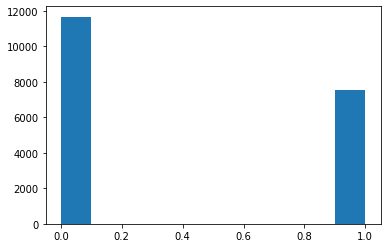

In [22]:
plt.hist(df['sqft_basement'])

In [23]:
#changing date to a an actual date
df['date'] = pd.DatetimeIndex(df['date'])

Now lets deal with outliers

In [24]:
df[df.columns[1]]

1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 19221, dtype: float64

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


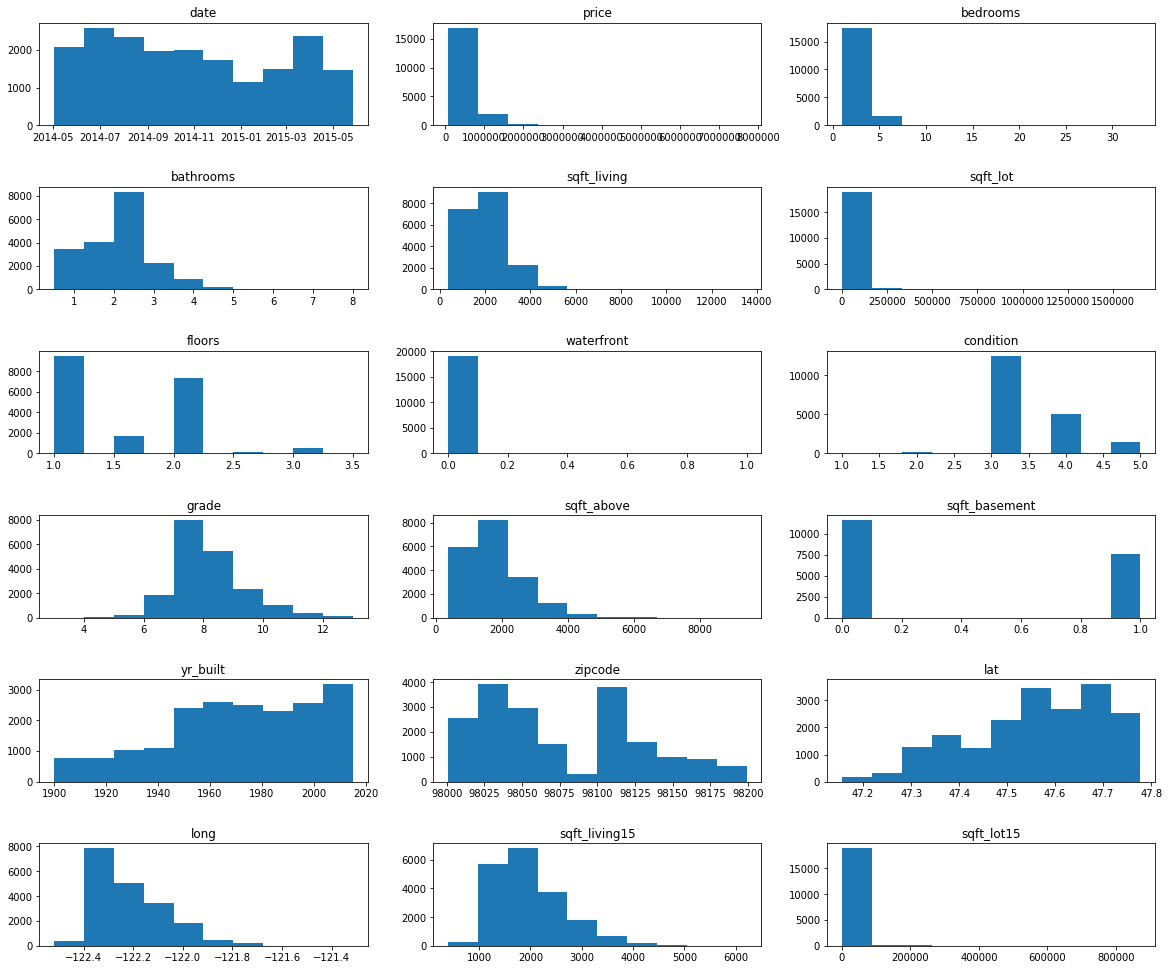

In [25]:
numgraphs = len(df.columns)
n = 3
fig, axes = plt.subplots(ncols = n, nrows = numgraphs//n+1, figsize = (20,20))
plt.title('Histogram of all data columns to help deal with outliers')
for x in range(numgraphs):
    row = x//n
    col = x%n
    ax = axes[row][col]
    ax.hist(df[df.columns[x]])  
    ax.set_title('{}'.format(df.columns[x]))

fig.subplots_adjust(hspace=0.6)    

less = n*(numgraphs//n+1)-numgraphs    

for b in range(less):          
    fig.delaxes(axes[numgraphs // n][n - 1 - b])

In [26]:
for column in df.columns:
    print (column)
    print (df[column].value_counts().head())
    print (df[column].value_counts().tail())
    print (len(df[column].value_counts()))
    print ('\n')

date
2014-06-23    124
2014-06-25    120
2014-06-26    116
2014-07-08    114
2015-04-21    112
Name: date, dtype: int64
2014-11-02    1
2015-02-01    1
2014-05-17    1
2014-08-03    1
2015-05-24    1
Name: date, dtype: int64
370


price
450000.0    153
350000.0    147
550000.0    144
500000.0    142
425000.0    135
Name: price, dtype: int64
225800.0    1
444500.0    1
608250.0    1
418800.0    1
884744.0    1
Name: price, dtype: int64
3391


bedrooms
3    8721
4    6149
2    2451
5    1441
6     227
Name: bedrooms, dtype: int64
8     11
9      6
10     3
11     1
33     1
Name: bedrooms, dtype: int64
12


bathrooms
2.50    4839
1.00    3411
1.75    2725
2.25    1788
2.00    1722
Name: bathrooms, dtype: int64
6.25    2
6.75    2
7.75    1
6.50    1
7.50    1
Name: bathrooms, dtype: int64
29


sqft_living
1300    125
1440    121
1400    120
1820    118
1660    113
Name: sqft_living, dtype: int64
2905    1
2793    1
4810    1
2665    1
2007    1
Name: sqft_living, dtype: int64
992


sqft_

 from the visualisations and from the min and max's we can see that we will need to deal with the variables: 
 price, bedrooms, bathrooms,sqft_living, Sqft_lot, grade, sqft_above, yr_built

(array([1.6745e+04, 1.0680e+03, 6.2000e+02, 2.0300e+02, 9.6000e+01,
        7.2000e+01, 6.7000e+01, 3.5000e+01, 2.1000e+01, 2.2000e+01,
        1.7000e+01, 2.6000e+01, 5.0000e+01, 7.0000e+01, 1.6000e+01,
        1.3000e+01, 1.2000e+01, 8.0000e+00, 3.0000e+00, 7.0000e+00,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00, 2.0000e+00,
        6.0000e+00, 9.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

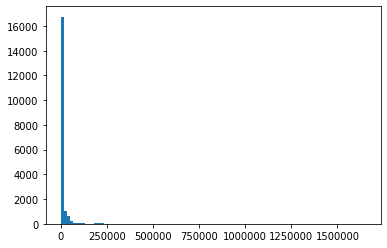

In [27]:
plt.hist(df['sqft_lot'], bins = 100)

In [28]:
print ('price')
print (df.price.quantile(q=0.015))
print (df.price.quantile(q=0.95))
print ('bedroom')
print (df.bedrooms.quantile(q = 0.975))
print ('bathroom')
print (df.bathrooms.quantile(q=0.975))
print ('sqft living')
print (df.sqft_living.quantile(q=0.015))
print (df.sqft_living.quantile(q=0.985))
print ('grade')
print (df.grade.quantile(q=0.025))
print ('sqft above')
print (df.sqft_above.quantile(q=0.015))
print (df.sqft_above.quantile(q=0.95))
print ('year built')
print (df.yr_built.quantile(q=0.025))
print (df.yr_built.quantile(q=0.975))
print ('sqft_lot')
print (df.sqft_lot.quantile(q=0.95))

price
168000.0
1170000.0
bedroom
5.0
bathroom
3.75
sqft living
760.0
4610.0
grade
6.0
sqft above
720.0
3400.0
year built
1908.0
2014.0
sqft_lot
43560.0


In [29]:
# based on the above and my judgement from the data i have thus far obsereved i have decided to delete the following
delete = df.loc[(df['price']>1170000) | (df['bedrooms']>6) | (df['bathrooms']>5) | (df['sqft_living']>4610) | 
                (df['sqft_above']<720) | (df['sqft_above']>3400) | (df['sqft_lot'] > 43560)].index
df.drop(delete, inplace = True)

In [30]:
df.price.max()

1170000.0

Dealing with Continuous or Categorical variables

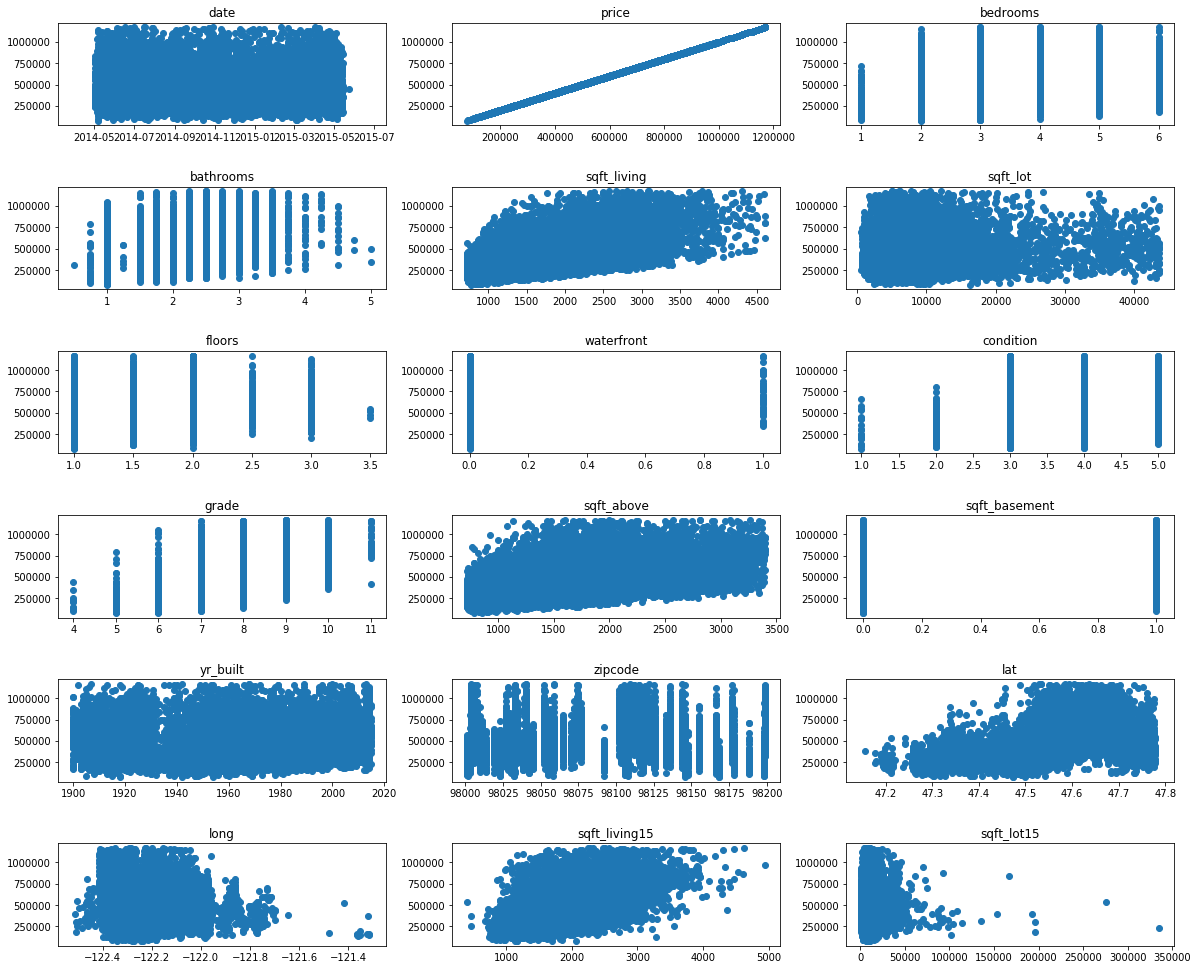

In [31]:
numgraphs = len(df.columns)
n = 3
fig, axes = plt.subplots(ncols = n, nrows = numgraphs//n+1, figsize = (20,20))
plt.title('Scatter plot of all data columns to help deal identify categorical data')
for x in range(numgraphs):
    row = x//n
    col = x%n
    ax = axes[row][col]
    ax.scatter(df[df.columns[x]], df['price'])  
    ax.set_title('{}'.format(df.columns[x]))

fig.subplots_adjust(hspace=0.6)    

less = n*(numgraphs//n+1)-numgraphs    

for b in range(less):          
    fig.delaxes(axes[numgraphs // n][n - 1 - b])

categoricals = bedroom, bathroom, floors, waterfront, condition, grade, sqft_basement, zipcode

ordinal = bedroom, bathroom, floors, condition, grade

change to dummies = waterfront, sqft_basement, zipcode (we will come to this later)

In [32]:
waterfront = pd.get_dummies(df["waterfront"], prefix="waterfront", drop_first = True)
basement = pd.get_dummies(df["sqft_basement"], prefix="basement", drop_first = True)
df.drop(["waterfront","sqft_basement"], axis=1, inplace = True)
df = pd.concat([df, waterfront, basement], axis=1)

Futher investigation into the data

want to investigate zipcodes, lat and long - i think they all relate to eachother.

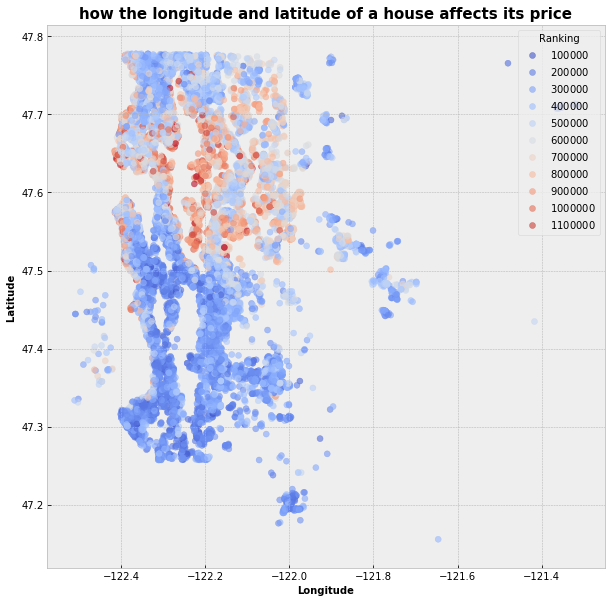

In [33]:
plt.style.use('bmh')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
scatter = ax.scatter(x=df["long"], y=df["lat"], c=(df["price"]), cmap="coolwarm", alpha = 0.6)
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="upper right", title="Ranking")
plt.xlabel('Longitude', fontsize = 10 , weight ='bold')
plt.ylabel('Latitude ', fontsize = 10, weight ='bold')
plt.title('how the longitude and latitude of a house affects its price', fontsize = 15, weight ='bold')
plt.show()


there seems to be a trend lets do a few quick tests to confirm this

In [34]:
model = ols(formula='price~lat', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4472.
Date:                Tue, 11 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:25:22   Log-Likelihood:            -2.2475e+05
No. Observations:               16629   AIC:                         4.495e+05
Df Residuals:                   16627   BIC:                         4.495e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -3.1e+07   4.71e+05    -65.881      0.000   -3.19e+07   -3.01e+07
lat         6.617e+05   9894.970     66.873      0.000    6.42e+05    6.81e+05
==============================================================================
Omnibus:                     1929.633   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2761.181
Skew:                           0.892   Prob(JB):                         0.00
Kurtosis:                       3.894   Cond. No.                     1.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model = ols(formula='price~long', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1243
Date:                Tue, 11 Aug 2020   Prob (F-statistic):              0.724
Time:                        17:25:23   Log-Likelihood:            -2.2673e+05
No. Observations:               16629   AIC:                         4.535e+05
Df Residuals:                   16627   BIC:                         4.535e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.644e+05   1.41e+06      0.683      0.494    -1.8e+06    3.73e+06
long        4071.4185   1.15e+04      0.353      0.724   -1.86e+04    2.67e+04
==============================================================================
Omnibus:                     1514.938   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1958.309
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                       3.303   Cond. No.                     1.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

we will use zipcodes to group our properties into categorical dummie variables then we can delete latitude and longitude

In [36]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'waterfront_1.0',
       'basement_1.0'],
      dtype='object')

In [37]:
zipcodes = pd.get_dummies(df["zipcode"], prefix="zipcode", drop_first = True)
df = pd.concat([df, zipcodes], axis=1)
#then lets drop zipcodes, long, lat
df.drop(["zipcode", "lat", "long"], axis = 1, inplace = True)
#also not sure what the 15's are so i will drop them
df.drop(['sqft_living15', "sqft_lot15"], axis = 1, inplace = True)

investigating date - for prediction this doesnt make sense, as for future houses they will not be sold so we need to find out if there is some sort of trend in this

In [38]:
df['day'] = pd.DatetimeIndex(df['date']).dayofweek
df['month'] = pd.DatetimeIndex(df['date']).month
df['quarter'] = pd.DatetimeIndex(df['date']).quarter

Text(0, 0.5, 'price')

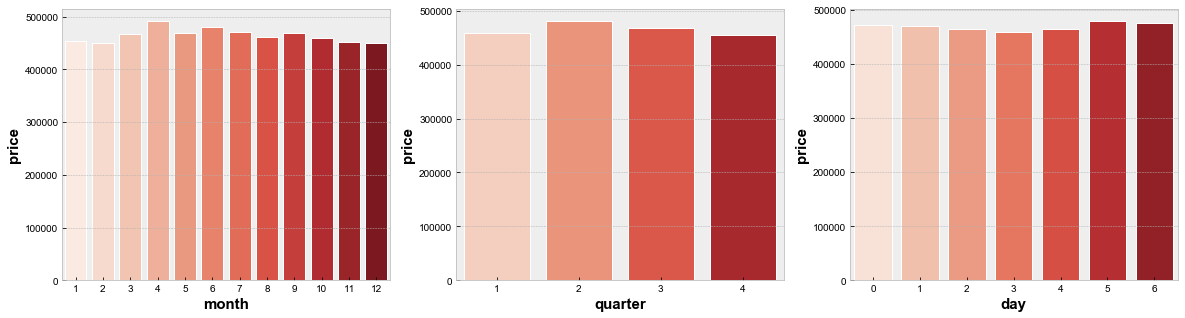

In [39]:
fig, (ax,ax1,ax2) = plt.subplots(1 , 3)
fig.set_size_inches(20,5)
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(x=df.groupby('month').mean()['price'].index.values , y=df.groupby('month').mean()['price'],palette="Reds", data=df, ax = ax)
ax.set_xlabel('month', fontsize = 15 , weight ='bold')
ax1 = sns.barplot(x=df.groupby('quarter').mean()['price'].index.values , y=df.groupby('quarter').mean()['price'],palette="Reds", data=df, ax=ax1)
ax1.set_xlabel('quarter', fontsize = 15 , weight ='bold')
ax2 = sns.barplot(x=df.groupby('day').mean()['price'].index.values , y=df.groupby('day').mean()['price'],palette="Reds", data=df, ax=ax2)
ax2.set_xlabel('day', fontsize = 15 , weight ='bold')
ax.set_ylabel('price', fontsize = 15, weight ='bold')
ax1.set_ylabel('price', fontsize = 15, weight ='bold')
ax2.set_ylabel('price', fontsize = 15, weight ='bold')


so we can see a clear trend between quarter and price this would help our model as we can interperate this as the quater when the home owner puts his house on the market.

as the relationship is not linear we will include this as a Dummy variable.


In [40]:
quarter = pd.get_dummies(df["quarter"], prefix="quarter") #we are not dropping a column as stepwise selection drops one anyway
df = pd.concat([df, quarter], axis=1)
df.drop(["date","day","month","quarter"], axis=1, inplace = True)

Multicolinearity

In [41]:
#no need for the graphs as due to the zipcodes there will be too many dummy variables

In [42]:
dfmc = df.corr().abs().stack().reset_index().sort_values(0, ascending = True)
dfmc['pairs'] =  list(zip(dfmc.level_0, dfmc.level_1))
dfmc.set_index(['pairs'], inplace = True)
dfmc.drop(columns = ['level_0', 'level_1'], inplace = True)
dfmc.columns = ['cc']


In [43]:
dfmc[(dfmc.cc>0.75) ]

,cc
pairs,
"(sqft_living, sqft_above)",0.809595
"(sqft_above, sqft_living)",0.809595
"(price, price)",1.000000
"(zipcode_98056, zipcode_98056)",1.000000
"(quarter_2, quarter_2)",1.000000
...,...
"(zipcode_98109, zipcode_98109)",1.000000
"(zipcode_98112, zipcode_98112)",1.000000
"(zipcode_98115, zipcode_98115)",1.000000


In [44]:
dfmc.drop_duplicates(inplace = True)
dfmc[(dfmc.cc>0.75) ]

,cc
pairs,
"(sqft_living, sqft_above)",0.809595
"(price, price)",1.000000


In [45]:
df.drop(columns = ['sqft_above'], inplace = True)

now lets check for hetroscadisticity, normality etc 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


R-Squared: 0.07058908550664056
Intercept    254318.242117
bedrooms      64079.297719
dtype: float64


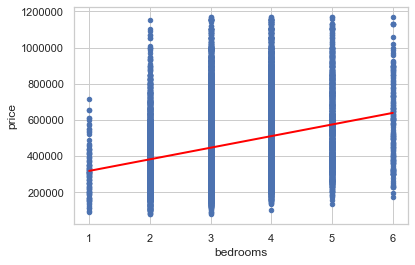

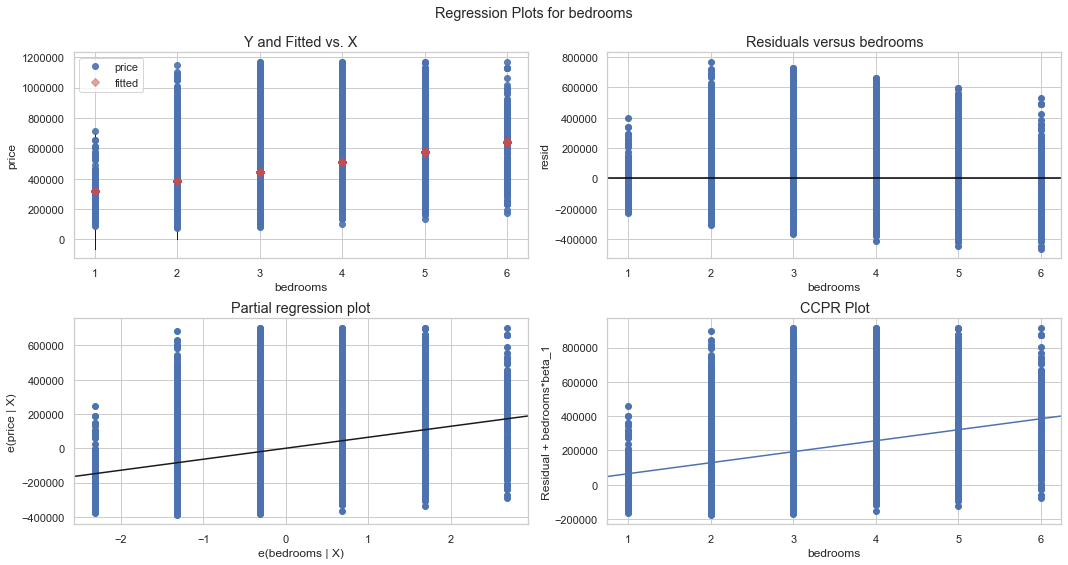

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[('Jarque-Bera', 1717.9550592145356), ('Prob', 0.0), ('Skew', 0.773296049662091), ('Kurtosis', 3.29582383373512)]
R-Squared: 0.1598312840317665
Intercept    225073.046016
bathrooms    119476.266928
dtype: float64


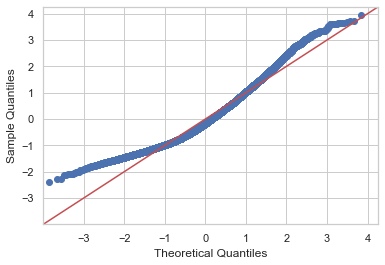

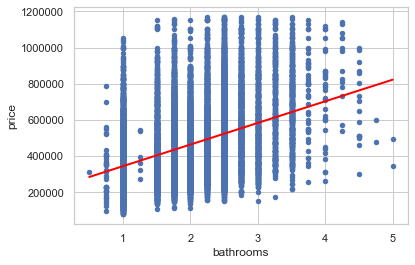

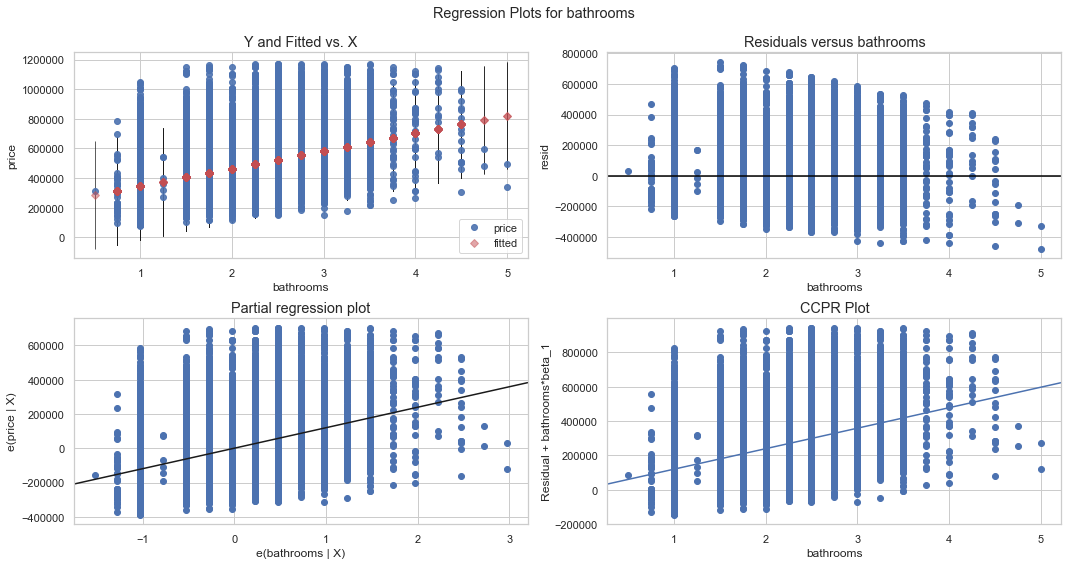

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[('Jarque-Bera', 1770.100927758517), ('Prob', 0.0), ('Skew', 0.7794781797949869), ('Kurtosis', 3.352667080698365)]
R-Squared: 0.32820514052522387
Intercept      140422.965396
sqft_living       170.778218
dtype: float64


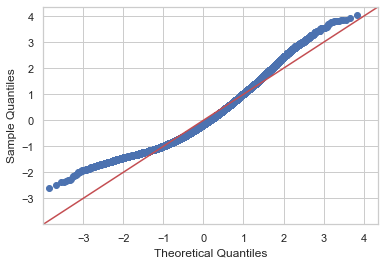

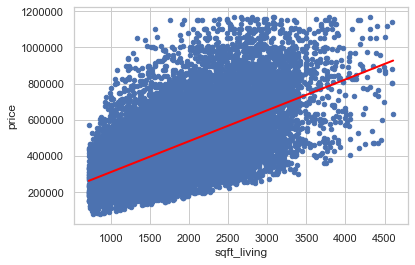

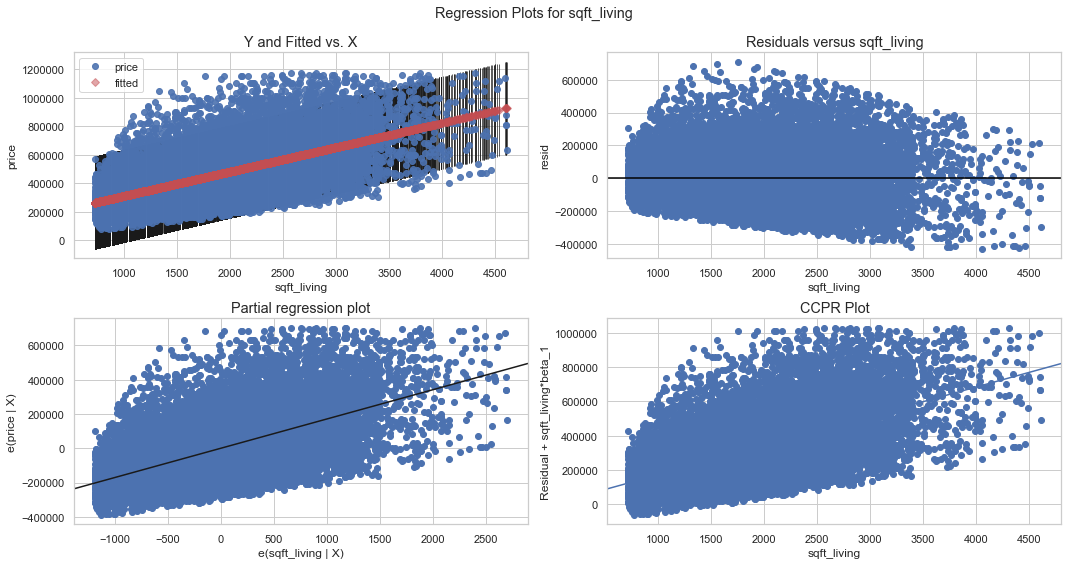

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[('Jarque-Bera', 1113.8436589974426), ('Prob', 1.35494790329229e-242), ('Skew', 0.6141968055424534), ('Kurtosis', 3.3140336109720074)]
R-Squared: 0.0023760843580553637
Intercept    453891.585598
sqft_lot          1.515904
dtype: float64


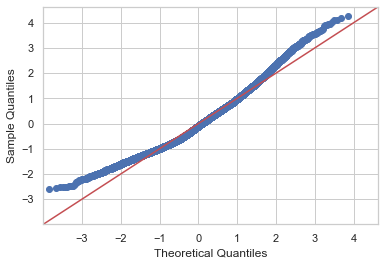

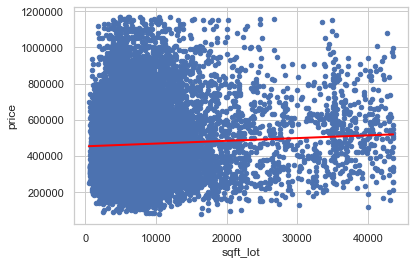

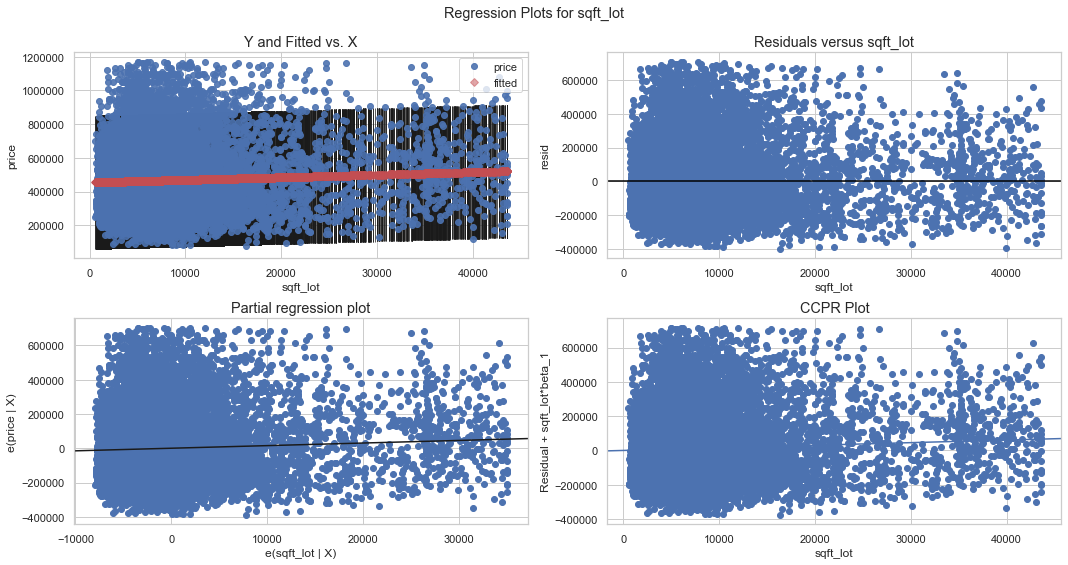

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[('Jarque-Bera', 1904.8564510282786), ('Prob', 0.0), ('Skew', 0.8162534735819), ('Kurtosis', 3.2900475195963197)]
R-Squared: 0.054376044518785194
Intercept    338869.409044
floors        87201.675616
dtype: float64


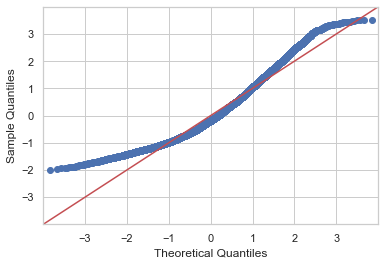

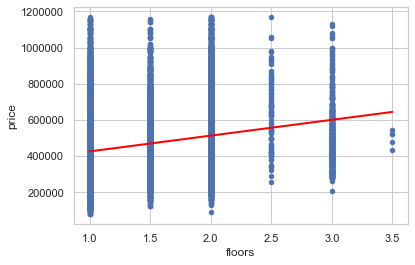

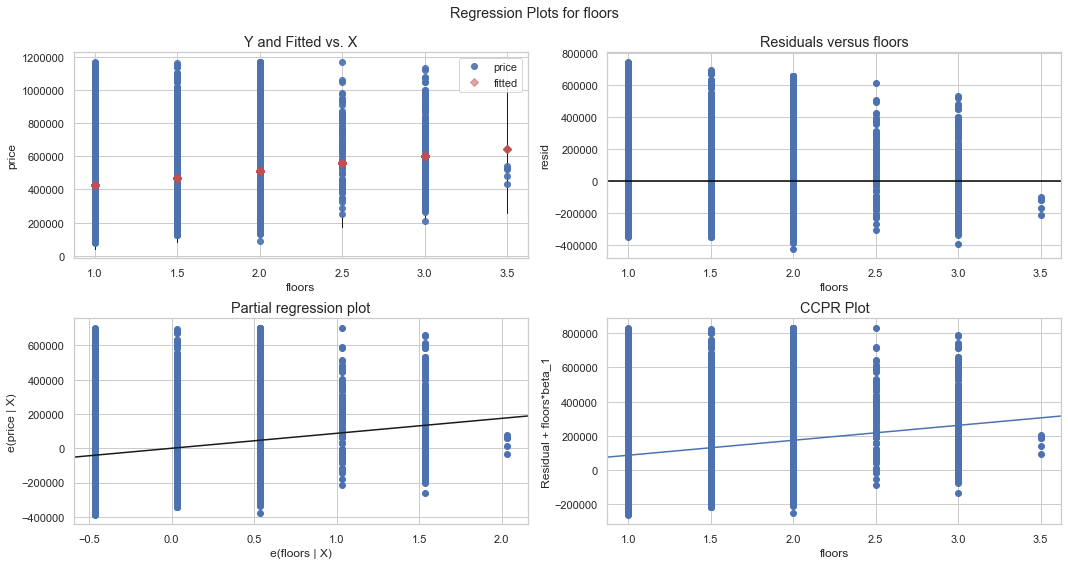

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[('Jarque-Bera', 2087.906025258326), ('Prob', 0.0), ('Skew', 0.8468986470073263), ('Kurtosis', 3.3800600949129906)]
R-Squared: 5.695465431077018e-05
Intercept    569432.112925
yr_built        -52.088451
dtype: float64


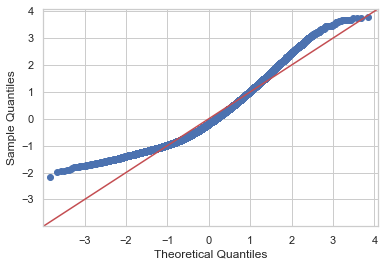

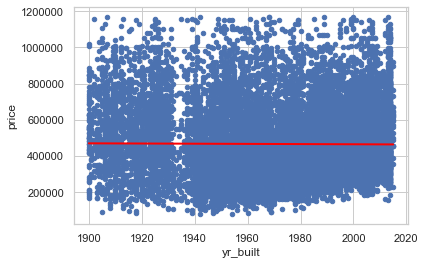

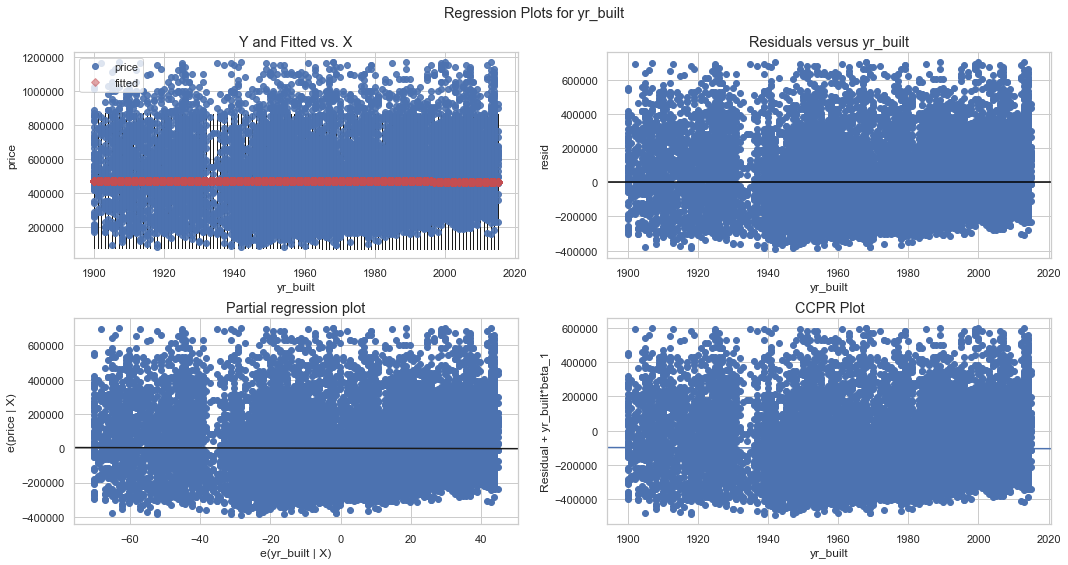

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[('Jarque-Bera', 1943.8527848608105), ('Prob', 0.0), ('Skew', 0.8239506942784027), ('Kurtosis', 3.2998490080153577)]
R-Squared: 0.0048471884243754815
Intercept    392835.828273
condition     21654.695961
dtype: float64


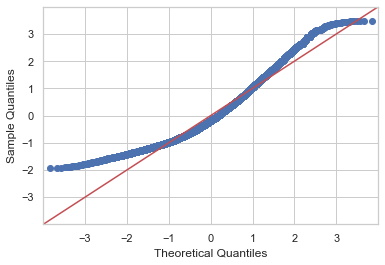

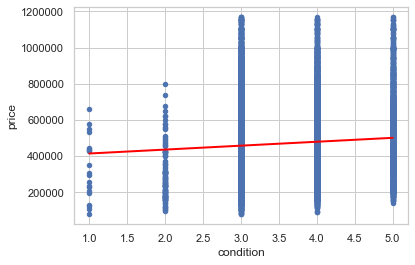

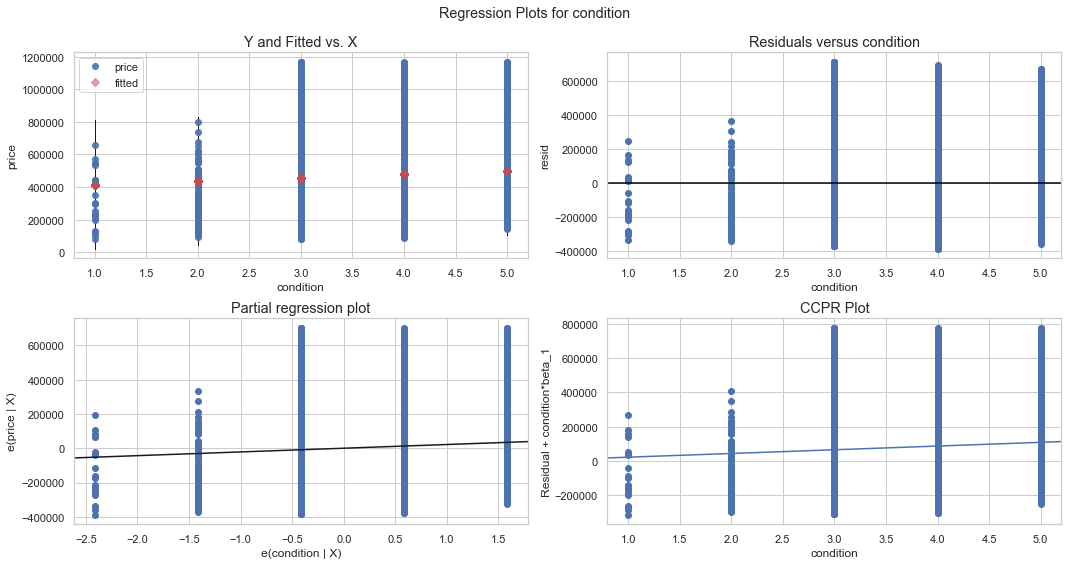

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[('Jarque-Bera', 1866.221007275563), ('Prob', 0.0), ('Skew', 0.8086186538903716), ('Kurtosis', 3.27926497719352)]
R-Squared: 0.3446667146315905
Intercept   -475379.967415
grade        125932.275254
dtype: float64


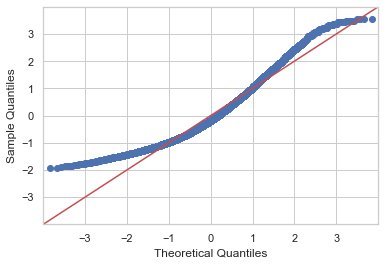

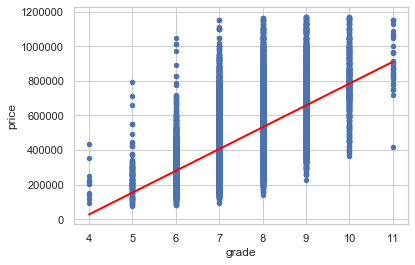

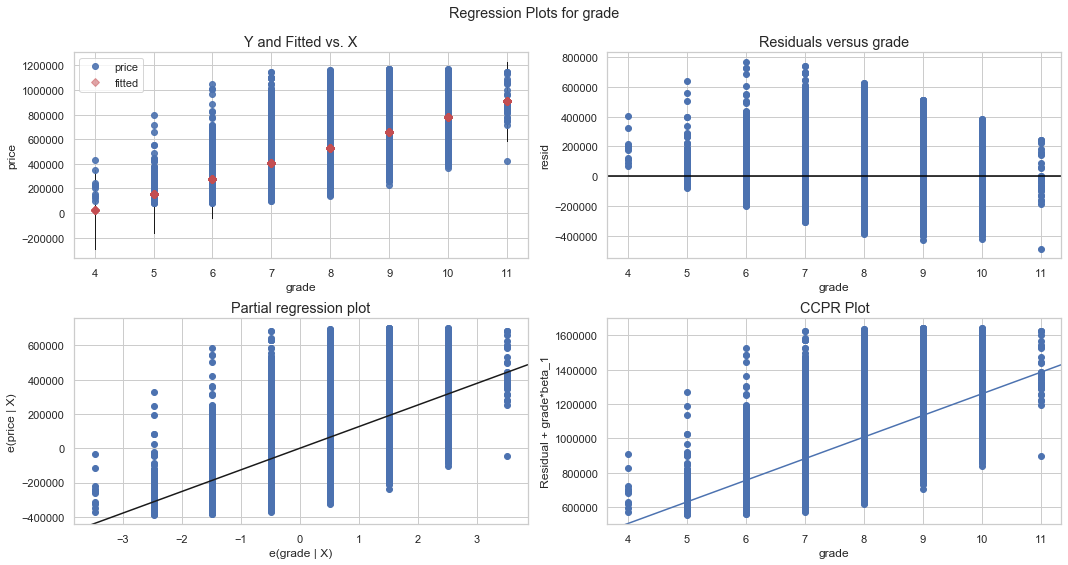

[('Jarque-Bera', 1758.5231399953939), ('Prob', 0.0), ('Skew', 0.7307400006222964), ('Kurtosis', 3.634102064653773)]


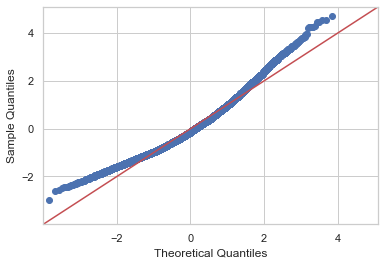

In [46]:
continuous = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built', 'condition', 'grade']
for x in continuous:
    f = 'price~{}'.format(x)
    model = ols(formula=f, data=df).fit()
    print ('R-Squared:',model.rsquared)
    print (model.params)
    X_new = pd.DataFrame({'{}'.format(x): [df['{}'.format(x)].min(), df['{}'.format(x)].max()]});
    preds = model.predict(X_new)
    df.plot(kind='scatter', x=x, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, x, fig=fig)
    plt.show()
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
    fig.show()
    name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    test = sms.jarque_bera(model.resid)
    print (list(zip(name, test)))
    lwr_thresh = df['{}'.format(x)].quantile(q=.45)
    upr_thresh = df['{}'.format(x)].quantile(q=.55)
    middle_10percent_indices = df[(df['{}'.format(x)] >= lwr_thresh) & (df['{}'.format(x)]<=upr_thresh)].index
    # len(middle_10percent_indices)

In [47]:
f = 'price~bathrooms'
model = ols(formula=f, data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     3163.
Date:                Tue, 11 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:25:43   Log-Likelihood:            -2.2528e+05
No. Observations:               16629   AIC:                         4.506e+05
Df Residuals:                   16627   BIC:                         4.506e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.251e+05   4531.458     49.669      0.000    2.16e+05    2.34e+05
bathrooms   1.195e+05   2124.355     56.241      0.000    1.15e+05    1.24e+05
==============================================================================
Omnibus:                     1396.499   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1770.101
Skew:                           0.779   Prob(JB):                         0.00
Kurtosis:                       3.353   Cond. No.                         8.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

i have checked all variables for normality using the jarque bera test and none are normal - what should i do?
from notes the GQ test showed different results from the visualisation so how do i decide
all data same sqewed not enough to log etc so we will leave it as is and do the multivarite regression test
first lets try find interactions 


stepwise
interactions
model

In [48]:

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included



In [49]:
dfvars = df.copy()
y = dfvars.price
X = dfvars.drop('price', axis = 1)

In [50]:
stepwisevars = stepwise_selection(X,y)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  zipcode_98004                  with p-value 3.8968e-167
Add  zipcode_98023                  with p-value 1.59295e-156
Add  zipcode_98092                  with p-value 5.28384e-93
Add  zipcode_98033                  with p-value 2.71589e-91
Add  zipcode_98003                  with p-value 2.33279e-88
Add  zipcode_98042                  with p-value 3.52992e-91
Add  zipcode_98040                  with p-value 1.29336e-88
Add  zipcode_98058                  with p-value 4.91429e-86
Add  zipcode_98030                  with p-value 3.47557e-75
Add  zipcode_98031                  with p-value 1.98644e-71
Add  zipcode_98038                  with p-value 2.34222e-78
Add  zipcode_98112                  with p-value 2.90132e-74
Add  zipcode_98115                  with p-value 7.71599e-77
Add  zipcode_98103                  with p-valu

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  zipcode_98166                  with p-value 3.22903e-11
Add  zipcode_98045                  with p-value 6.04051e-14
Drop zipcode_98168                  with p-value 0.136402
Add  zipcode_98019                  with p-value 8.26764e-11
Drop zipcode_98038                  with p-value 0.881268
Add  zipcode_98014                  with p-value 1.84258e-09
Drop zipcode_98055                  with p-value 0.998892
Add  zipcode_98024                  with p-value 2.32915e-09
Drop zipcode_98198                  with p-value 0.443191
Add  zipcode_98010                  with p-value 9.8608e-06
Drop zipcode_98188                  with p-value 0.505101
Add  zipcode_98178                  with p-value 3.06188e-05
Drop zipcode_98058                  with p-value 0.890797
Add  zipcode_98070                  with p-value 0.00727939
Add  zipcode_98038                  with p-value 0.00421389


In [51]:
X = dfvars[np.intersect1d(dfvars.columns, stepwisevars)]

interactions

In [52]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=2)

baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.8131918634468619

In [53]:
interactions = []

feat_combinations = combinations(continuous, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])


Top 3 interactions: [('sqft_living', 'grade', 0.817), ('sqft_living', 'sqft_lot', 0.816), ('sqft_living', 'floors', 0.816)]


add top two interactions in then build model

In [54]:
X['sqft_living_grade'] = X['sqft_living']*X['grade']
X['sqft_living_floors'] = X['sqft_living']*X['floors']

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


build model

In [55]:
X.drop(['sqft_living'], axis = 1)

,basement_1.0,bathrooms,bedrooms,condition,floors,grade,quarter_1,quarter_2,sqft_lot,waterfront_1.0,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98199,sqft_living_grade,sqft_living_floors
1,1,2.25,3,3,2.0,7,0,0,7242,0,...,0,0,0,0,0,0,0,0,17990,5140.0
2,0,1.00,2,3,1.0,6,1,0,10000,0,...,0,0,0,0,0,0,0,0,4620,770.0
3,1,3.00,4,5,1.0,7,0,0,5000,0,...,1,0,0,0,0,0,0,0,13720,1960.0
4,0,2.00,3,3,1.0,8,1,0,8080,0,...,0,0,0,0,0,0,0,0,13440,1680.0
6,0,2.25,3,3,2.0,7,0,1,6819,0,...,0,0,0,0,0,0,0,0,12005,3430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,1,2.50,3,3,2.0,8,1,0,1294,0,...,0,0,0,0,0,0,0,0,10480,2620.0
21592,0,2.50,3,3,3.0,8,0,1,1131,0,...,0,0,0,0,0,0,0,0,12240,4590.0
21593,0,2.50,4,3,2.0,8,1,0,5813,0,...,0,0,1,0,0,0,0,0,18480,4620.0
21594,0,0.75,2,3,2.0,7,0,1,1350,0,...,0,1,0,0,0,0,0,0,7140,2040.0


In [56]:
regression.fit(X, y)
print (regression.intercept_)
coefficients = dict(zip(X,list(regression.coef_)))
print (coefficients)

1025358.7470849721
{'basement_1.0': -13305.202532485959, 'bathrooms': 17773.74962594338, 'bedrooms': -4308.31359564182, 'condition': 23238.341744526242, 'floors': -55716.199859899745, 'grade': 28418.342226601293, 'quarter_1': 16274.917103782034, 'quarter_2': 16934.814708215068, 'sqft_living': -14.006253671483137, 'sqft_lot': 0.8228996068064589, 'waterfront_1.0': 327949.48677194817, 'yr_built': -595.0790299021173, 'zipcode_98002': -22965.199076593577, 'zipcode_98003': -28920.285650578327, 'zipcode_98004': 494519.1651612667, 'zipcode_98005': 305145.7379663371, 'zipcode_98006': 250827.25255343638, 'zipcode_98007': 221371.6455636157, 'zipcode_98008': 223129.49472532026, 'zipcode_98010': 57768.74523924071, 'zipcode_98011': 119446.80444518439, 'zipcode_98014': 80559.9777410654, 'zipcode_98019': 66258.80037847025, 'zipcode_98022': -21739.175978190025, 'zipcode_98023': -47728.975128287384, 'zipcode_98024': 101686.72096402182, 'zipcode_98027': 166481.0596145482, 'zipcode_98028': 110570.53659414

In [76]:
zipc = {k: v for k, v in coefficients.items() if k.startswith("zipcode_")}
inverse = [(value, key) for key, value in zipc.items()]
print(max(inverse))
print(min(inverse))

(626741.1682120404, 'zipcode_98039')
(-49222.20659102773, 'zipcode_98092')


In [57]:
dic = {k: v for k, v in coefficients.items() if not k.startswith("zipcode_")}
dic

{'basement_1.0': -13305.202532485959,
 'bathrooms': 17773.74962594338,
 'bedrooms': -4308.31359564182,
 'condition': 23238.341744526242,
 'floors': -55716.199859899745,
 'grade': 28418.342226601293,
 'quarter_1': 16274.917103782034,
 'quarter_2': 16934.814708215068,
 'sqft_living': -14.006253671483137,
 'sqft_lot': 0.8228996068064589,
 'waterfront_1.0': 327949.48677194817,
 'yr_built': -595.0790299021173,
 'sqft_living_grade': 12.02992484952847,
 'sqft_living_floors': 26.4212815931387}

In [58]:
ypredicted = regression.predict(X)

In [59]:
SS_residual = np.sum((y - ypredicted)**2)
SS_total = np.sum((y - np.mean(y))**2)

r_squared = 1 - (float(SS_residual)) / SS_total
adj_r_squared = 1 - (1 - r_squared)*(len(y) - 1) / (len(y) - X.shape[1] - 1)

In [60]:
print(r_squared)
print(adj_r_squared)

0.8200840707382043
0.8192470502226368


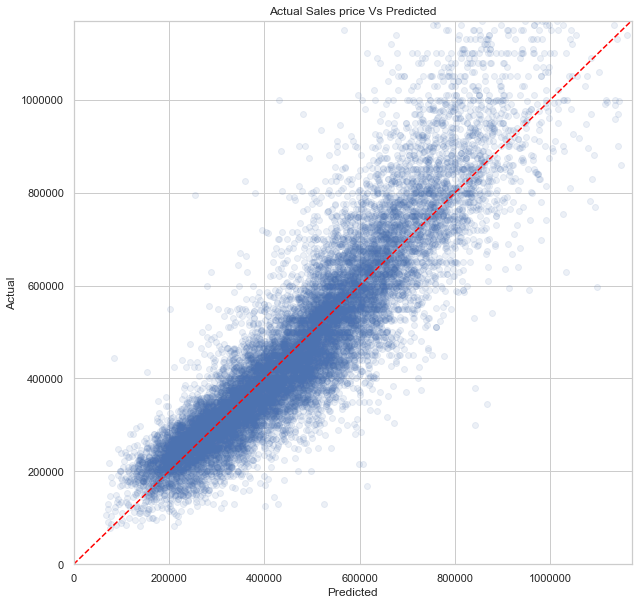

In [61]:
plt.figure(figsize = (10,10))
plt.scatter(ypredicted, y, alpha = 0.1)
plt.plot([0,1170000], [0,1170000], color='red', ls='--')

plt.xlim(0,1170000)
plt.ylim(0,1170000)

plt.title('Actual Sales price Vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [62]:
np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

0.8178531559110288

lets use this model to predict current house prices

In [63]:
dic

{'basement_1.0': -13305.202532485959,
 'bathrooms': 17773.74962594338,
 'bedrooms': -4308.31359564182,
 'condition': 23238.341744526242,
 'floors': -55716.199859899745,
 'grade': 28418.342226601293,
 'quarter_1': 16274.917103782034,
 'quarter_2': 16934.814708215068,
 'sqft_living': -14.006253671483137,
 'sqft_lot': 0.8228996068064589,
 'waterfront_1.0': 327949.48677194817,
 'yr_built': -595.0790299021173,
 'sqft_living_grade': 12.02992484952847,
 'sqft_living_floors': 26.4212815931387}

In [ ]:
def price_calculator():
    
    houseprice = regression.intercept_
    
    #basement
    basement = input('do you have a basement? yes/no')
    if basement == 'yes':
        baseval = coefficients['basement_1.0']
    else:
        baseval = 0
    houseprice += baseval
    
    #bathrooms
    bathrooms = input('how many bathrooms do you have 1-5')
    bathval = coefficients['bathrooms']*float(bathrooms)
    houseprice += bathval
    
    #bedrooms
    bedrooms = input('how many bedrooms do you have 1-6')
    bedval = coefficients['bedrooms']*float(bedrooms)
    houseprice += bedval    

    #condition
    condition = input('what is the condition of your house 1-5')
    condval = coefficients['condition']*float(condition)
    houseprice += condval
    
    #floors
    floors = input('how many floors do you have in your house? 1-3.5')
    floorsval = coefficients['floors']*float(floors)
    houseprice += floorsval
    
    #grade
    grade = input('what is the grade of your house? 4-11')
    gradeval = coefficients['grade']*float(grade)
    houseprice += gradeval
    
    #quarter - only 1/2 because stepwise dropped 2
    quarter = input('when do you want to sell your house? 1-2')
    quarterval = coefficients['quarter_{}'.format(quarter)]
    houseprice += quarterval
    
    #sqft_living
    sqft_living = input('what is the sqft of your living area? 720-4610')
    sqlivval = coefficients['sqft_living']*float(sqft_living)
    houseprice += sqlivval
    
    #sqft_lot
    sqft_lot = input('what is the sqft of your lot area? 520-1651359')
    sqlotvval = coefficients['sqft_lot']*float(sqft_lot)
    houseprice += sqlotvval
    
    #waterfront
    waterfront = input('do you have a waterfront view? yes/no')
    if waterfront == 'yes':
        waterval = coefficients['waterfront_1.0']
    else:
        waterval = 0
    houseprice += waterval
    
    #yr_built
    built = input('when was your house built? 1900-2015')
    builtval = coefficients['yr_built']*float(built)
    houseprice += builtval
    
    #sqft_living_grade
    livgrade = float(sqft_living)*float(grade)
    livgradeval = coefficients['sqft_living_grade']*float(livgrade)
    houseprice += livgradeval
    
    #sqft_living_floors
    livfloors = float(sqft_living)*float(floors)
    livfloorsval = coefficients['sqft_living_floors']*float(livfloors)
    houseprice += livfloorsval
    
    #zipcode
    zipc = input('what is you house zipcode?')
    zipval = coefficients['zipcode_{}'.format(zipc)]
    houseprice += zipval

    
    return 'The property is predicted to be valued at ${}'.format(round(houseprice, 0))


In [78]:
price_calculator()

do you have a basement? yes/nono
how many bathrooms do you have 1-52.5
how many bedrooms do you have 1-64
what is the condition of your house 1-55
how many floors do you have in your house? 1-3.52
what is the grade of your house? 4-1111
when do you want to sell your house? 3-41
what is the sqft of your living area? 720-46103330
what is the sqft of your lot area? 520-165135910890
do you have a waterfront view? yes/nono
when was your house built? 1900-20151989
what is you house zipcode?98011


'The property is predicted to be valued at $900973.0'

In [79]:
price_calculator()

do you have a basement? yes/nono
how many bathrooms do you have 1-52
how many bedrooms do you have 1-63
what is the condition of your house 1-54
how many floors do you have in your house? 1-3.51
what is the grade of your house? 4-119
when do you want to sell your house? 3-41
what is the sqft of your living area? 720-46101150
what is the sqft of your lot area? 520-16513598640
do you have a waterfront view? yes/nono
when was your house built? 1900-20151952
what is you house zipcode?98133


'The property is predicted to be valued at $460396.0'

In [81]:
(585000-460000)/460000

0.2717391304347826

So what do we advise homeowners?

It is clear that the house prices advertised are above what you should be paying - use this program to help you make more informed decisions.

As a guideline:
Location is everything - try find a property in a good zipcode these tend to be in the North Western areas and include zipcodes such as 98040 and 98039

the grandure of the house doesnt matter - you dont need too many rooms, too many floors, a basement etc

what you should look for - newly built, good condition, good grade